In [41]:
# Initial imports
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)
from libs.drew_lib import *
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [42]:
asset_dataframe_list = []
for asset in keywords:

    asset_dataframe = pd.read_csv(f'./Data/Cleaned_Data/test/{asset}.csv', parse_dates = True, infer_datetime_format = True)
    asset_dataframe = asset_dataframe.set_index('Unnamed: 0')
    asset_dataframe.index.name = 'date'
    asset_dataframe.index = pd.to_datetime(asset_dataframe.index)
    cols = ['stockmarket_positive_sentiment',
        'stockmarket_negative_sentiment',
        'stockmarket_neutral_sentiment',	
        'stockmarket_compound_sentiment',
        'volume',
        'close'
    ]
    asset_dataframe = asset_dataframe[cols]
    asset_dataframe.rename(columns={
        'stockmarket_compound_sentiment':'r/stockmarket_compound',
        'stockmarket_positive_sentiment':'r/stockmarket_pos',
        'stockmarket_neutral_sentiment':'r/stockmarket_neu',
        'stockmarket_negative_sentiment':'r/stockmarket_neg'
    },inplace=True)

    asset_dataframe_list.append(asset_dataframe)

In [43]:
asset_sec_list = []
for asset in keywords:

    asset_dataframe = pd.read_csv(f'./Data/Cleaned_Data/SEC_sentiment_and_stocks/{asset}.csv', parse_dates = True, infer_datetime_format = True)
    asset_dataframe = asset_dataframe.set_index('date')
    asset_dataframe.index = pd.to_datetime(asset_dataframe.index)
    asset_dataframe.drop(asset_dataframe.columns[-3:],axis=1,inplace=True)
    asset_dataframe.rename(columns={
        'pos':'sec_pos',
        'neg':'sec_neg',
        'neu':'sec_neu',
        'compound':'sec_compound'
    },inplace=True)

    asset_sec_list.append(asset_dataframe)

In [44]:
NFLX = pd.concat([asset_sec_list[0],asset_dataframe_list[0]],axis=1,join='outer')
FB = pd.concat([asset_sec_list[1],asset_dataframe_list[1]],axis=1,join='outer')
UBER = pd.concat([asset_sec_list[2],asset_dataframe_list[2]],axis=1,join='outer')
MCHP = pd.concat([asset_sec_list[3],asset_dataframe_list[3]],axis=1,join='outer')
ABNB = pd.concat([asset_sec_list[4],asset_dataframe_list[4]],axis=1,join='outer')
FANG = pd.concat([asset_sec_list[5],asset_dataframe_list[5]],axis=1,join='outer')
MRO = pd.concat([asset_sec_list[6],asset_dataframe_list[6]],axis=1,join='outer')
DVN = pd.concat([asset_sec_list[7],asset_dataframe_list[7]],axis=1,join='outer')
SPWR = pd.concat([asset_sec_list[8],asset_dataframe_list[8]],axis=1,join='outer')
REGI = pd.concat([asset_sec_list[9],asset_dataframe_list[9]],axis=1,join='outer')
MTRX = pd.concat([asset_sec_list[10],asset_dataframe_list[10]],axis=1,join='outer')
BLK = pd.concat([asset_sec_list[11],asset_dataframe_list[11]],axis=1,join='outer')
PYPL = pd.concat([asset_sec_list[12],asset_dataframe_list[12]],axis=1,join='outer')
MELI = pd.concat([asset_sec_list[13],asset_dataframe_list[13]],axis=1,join='outer')
SOFI = pd.concat([asset_sec_list[14],asset_dataframe_list[14]],axis=1,join='outer')

In [79]:
NFLX

,ticker,sec_pos,sec_neg,sec_neu,sec_compound,r/stockmarket_pos,r/stockmarket_neg,r/stockmarket_neu,r/stockmarket_compound,volume,close
date,,,,,,,,,,,
2015-12-01,NFLX,0.110,0.024,0.865,1.0000,0.061000,0.028000,0.911000,0.640500,12550755.0,125.37
2015-12-02,NFLX,0.110,0.024,0.865,1.0000,0.158714,0.047571,0.793857,0.441443,24105712.0,128.93
2015-12-03,NFLX,0.110,0.024,0.865,1.0000,0.158714,0.047571,0.793857,0.441443,26644540.0,126.81
2015-12-04,NFLX,0.110,0.024,0.865,1.0000,0.362000,0.000000,0.638000,0.910000,20250411.0,130.93
2015-12-07,NFLX,0.110,0.024,0.865,1.0000,0.266000,0.000000,0.734000,0.964300,23351531.0,125.36
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,NFLX,0.127,0.040,0.833,0.9999,0.016000,0.177750,0.806250,-0.380950,8488881.0,187.83
2022-05-26,NFLX,0.127,0.040,0.833,0.9999,0.103000,0.093250,0.803750,0.042725,8039904.0,191.40
2022-05-27,NFLX,0.127,0.040,0.833,0.9999,0.103000,0.093250,0.803750,0.042725,8567288.0,195.19


In [80]:
def fill_and_bin(df):
    #df = return_bin(df)
    #df['return_bin'] = df['return_bin'].fillna('no gain/loss')
    #df['returns'] = df['returns'].fillna(0)
    df[['r/stockmarket_compound','r/stockmarket_pos','r/stockmarket_neu','r/stockmarket_neg','close']] = df[['r/stockmarket_compound','r/stockmarket_pos','r/stockmarket_neu','r/stockmarket_neg','close']].fillna(method='ffill')
    df.drop(columns=['volume'],inplace=True)
    #df['volume'] = df['volume'].fillna(df['volume'].mean())
    return df

In [81]:
ticker_df_list = [NFLX,FB,UBER,MCHP,ABNB,FANG,MRO, DVN, SPWR,REGI,MTRX,BLK, PYPL,MELI,SOFI]
[fill_and_bin(df) for df in ticker_df_list]

[           ticker  sec_pos  sec_neg  sec_neu  sec_compound  r/stockmarket_pos  \
 date                                                                            
 2015-12-01   NFLX    0.110    0.024    0.865        1.0000           0.061000   
 2015-12-02   NFLX    0.110    0.024    0.865        1.0000           0.158714   
 2015-12-03   NFLX    0.110    0.024    0.865        1.0000           0.158714   
 2015-12-04   NFLX    0.110    0.024    0.865        1.0000           0.362000   
 2015-12-07   NFLX    0.110    0.024    0.865        1.0000           0.266000   
 ...           ...      ...      ...      ...           ...                ...   
 2022-05-25   NFLX    0.127    0.040    0.833        0.9999           0.016000   
 2022-05-26   NFLX    0.127    0.040    0.833        0.9999           0.103000   
 2022-05-27   NFLX    0.127    0.040    0.833        0.9999           0.103000   
 2022-05-31   NFLX    0.127    0.040    0.833        0.9999           0.097500   
 2022-06-01   NF

In [47]:
# NFLX['mean_compound'] = NFLX[['sec_compound','r/stockmarket_compound']].mean(axis=1)
# NFLX

In [48]:
# NFLX['returns'] = NFLX['close'].pct_change()
# NFLX['sentiment_change'] = NFLX['r/stockmarket_compound'].pct_change()
# NFLX[['returns','sentiment_change']] = NFLX[['returns','sentiment_change']].fillna(0)
# NFLX

In [49]:
# def window_data(df, window):
#     """
#     This function accepts the column number for the features (X) and the target (y).
#     It chunks the data up with a rolling window of Xt - window to predict Xt.
#     It returns two numpy arrays of X and y.
#     """
#     X = []
#     y = []
#     for i in range(len(df) - window):
#         features = df.iloc[i : (i + window), 1:-1]
#         target = df.iloc[(i + window), -1]
#         X.append(features)
#         y.append(target)
#     return np.array(X), np.array(y).reshape(-1, 1)

In [50]:
# window = 30
# X, y = window_data(NFLX, window)

# #print (f"X sample values:\n{X[:5]} \n")
# #print (f"y sample values:\n{y[:5]}")


In [51]:
# X = X.reshape(-1,1)

In [52]:
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [53]:
# scaler = MinMaxScaler()
# # enc = OneHotEncoder()
# #enc.fit(y_train)

# # y_train_enc = enc.transform(y_train).toarray()
# # y_test_enc = enc.transform(y_test).toarray()

# # Fit the MinMaxScaler object with the training feature data X_train
# #nsamples, nx, ny = X_train.shape
# #X_train = X_train.reshape(nsamples,nx*ny)

# scaler.fit(X_train)

# # Scale the features training and testing sets
# X_train_scaled = scaler.transform(X_train)

# # nsamples, nx, ny = X_test.shape
# # X_test = X_test.reshape(nsamples,nx*ny)

# X_test_scaled = scaler.transform(X_test)

# # Fit the MinMaxScaler object with the training target data y_train

# scaler.fit(y_train)

# # # # # Scale the target training and testing sets
# y_train_scaled = scaler.transform(y_train)
# y_test_scaled = scaler.transform(y_test)

In [82]:
def window_data(df, window, feature_col_list, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []

    for i in range(len(df) - window):
        for feature_col in feature_col_list:
            features = df.iloc[i : (i + window), feature_col]
            X.append(features)
        target = df.iloc[(i + window), target_col_number]
        y.append(target)

    return np.array(X), np.array(y).reshape(-1, 1)

In [109]:
window_size = 1

feature_column_list = range(1,9)
target_column = 9
X, y = window_data(NFLX, window_size, feature_column_list, target_column)
print (f"X sample values:\n{X[:5]} \n")
print (f"y sample values:\n{y[:5]}")

X sample values:
[[0.11 ]
 [0.024]
 [0.865]
 [1.   ]
 [0.061]] 

y sample values:
[[128.93]
 [126.81]
 [130.93]
 [125.36]
 [126.98]]


In [110]:
split = int(0.75 * len(X))
X_train = X[: split]
X_test = X[-1]
X_test = X_test.reshape(-1,1)
y_train = y[: split]
y_test = y[-1]
y_test = y_test.reshape(-1,1)

In [107]:
X_test

array([[ 0.1699875 ],
       [ 0.09403393],
       [ 0.17657724],
       [ 0.0597129 ],
       [ 0.22566   ],
       [ 0.1509    ],
       [ 0.7278    ],
       [ 0.6273    ],
       [ 0.6273    ],
       [-0.4767    ],
       [ 0.        ],
       [ 0.        ],
       [ 0.14086667],
       [ 0.27258333],
       [ 0.16288571],
       [ 0.17903846],
       [ 0.26639474],
       [ 0.07404286],
       [-0.19362   ],
       [ 0.4019    ],
       [-0.36254   ],
       [-0.0032    ],
       [ 0.0258    ],
       [-0.3004    ],
       [ 0.11365   ],
       [-0.13435   ],
       [-0.38095   ],
       [ 0.042725  ],
       [ 0.042725  ],
       [ 0.08895   ]])

In [76]:
# msk = (len(X)) < 0.7

# X_train = X[msk]
# X_test = X[~msk]
# y_train = y[msk]
# y_test = y[~msk]

# nsamples, nx, ny = X_train.shape
# X_train = X_train.reshape(-1,nx*ny)

In [ ]:
# #np.shape(X_train) #if X_train is an array or X_train.shape if X_train is a pandas dataframe.
# # Reshape the features for the model
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
# #print (f"X_train sample values:\n{X_train[:5]} \n")
# #print (f"X_test sample values:\n{X_test[:5]}")

# # Reshape the features for the model
# y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], 1))
# y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], 1))
# print (f"y_train sample values:\n{y_train[:5]} \n")
# print (f"y_test sample values:\n{y_test[:5]}")

In [111]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the training feature data X_train
scaler.fit(X_train)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the training target data y_train
scaler.fit(y_train)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [19]:
# # Reshape the features for the model
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
# print (f"X_train sample values:\n{X_train[:5]} \n")
# print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.126]
  [0.126]
  [0.126]
  [0.126]
  [0.126]
  [0.126]
  [0.126]
  [0.126]
  [0.126]]

 [[0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.126]
  [0.126]
  [0.126]
  [0.126]
  [0.126]
  [0.126]
  [0.126]
  [0.126]
  [0.126]
  [0.126]]

 [[0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.126]
  [0.126]
  [0.126]
  [0.126]
  [0.126]
  [0.126]
  [0.126]
  [0.126]
  [0.126]
  [0.126]
  [0.126]]

 [[0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
  [0.11 ]
 

In [112]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 5
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [113]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [114]:
# Summarize the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 5)              140       
                                                                 
 dropout_6 (Dropout)         (None, 1, 5)              0         
                                                                 
 lstm_7 (LSTM)               (None, 1, 5)              220       
                                                                 
 dropout_7 (Dropout)         (None, 1, 5)              0         
                                                                 
 lstm_8 (LSTM)               (None, 5)                 220       
                                                                 
 dropout_8 (Dropout)         (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [115]:
# Train the model
model.fit(X_train, y_train, epochs=1, shuffle=False, batch_size=1, verbose=1)

ValueError: Data cardinality is ambiguous:
  x sizes: 9864
  y sizes: 1644
Make sure all arrays contain the same number of samples.

In [24]:
# Evaluate the model
model.evaluate(X_test, y_test)

137/137 [==============================] - 2s 5ms/step - loss: nan


nan

In [25]:
# Make some predictions
predicted = model.predict(X_test)

In [26]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [33]:
#real_prices
NFLX.iloc[NFLX['close']==185.73]
NFLX.iloc[NFLX['close']==197.44]

ValueError: iLocation based boolean indexing cannot use an indexable as a mask

In [36]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = NFLX.index[-len(real_prices): ])
stocks.head()

ValueError: Length of values (4361) does not match length of index (1645)

<AxesSubplot:xlabel='date'>

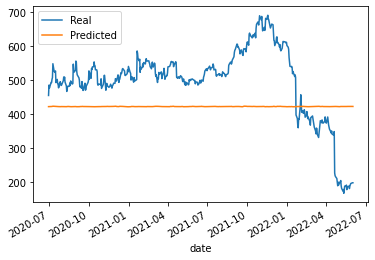

In [ ]:
# Plot the real vs predicted prices as a line chart
stocks.plot()